# `dseq`

> Deep sequencing data analysis in `pandas`.

## Install

```sh
pip install dseq
```

## How to use

### Read the bam file as a pandas dataframe

In [ ]:
from dseq.tools import to_df
df=to_df(
    bam_path='data/test.bam', # path to the bam file
    contig='14',              # i.e. reference name/ target
    start=74846395,           # start position
    end=74846545,             # end position
    verbose=True,             # verbose
)
df.head(1)

,query id,CIGAR,read position,reference position,reference,read
0,M04377:211:000000000-D637H:1:1101:7912:5949::u...,151M,0.0,74846395.0,C,C


## How to calculate

In [ ]:
#|hide
## set the display options
import pandas as pd
pd.set_option('display.max_columns', int(df['read position'].max()))

### Coverage per position (`QC`)

In [ ]:
data=df.dseq.get_coverage()
data.head(1)

,reference position,reference,depth
0,74846395.0,C,377


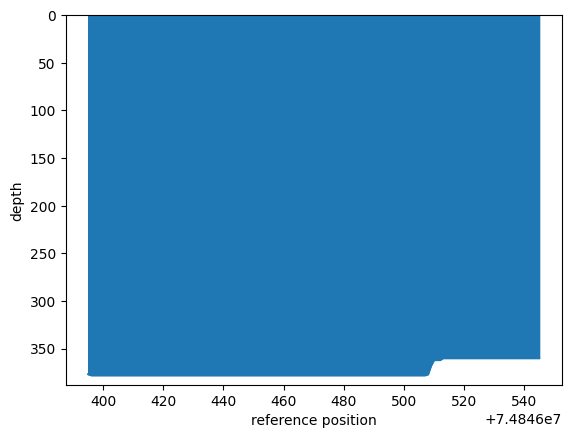

In [ ]:
## plot
_=data.plot.area(
    x='reference position',
    y='depth',
    ylabel='depth',
    ylim=(data['depth'].max()+10,0),
    legend=False,
)

### Number of reads per mutations (`QC`)

In [ ]:
data=df.dseq.get_counts_per_mutation()
data.head(1)

4    1
dtype: int64

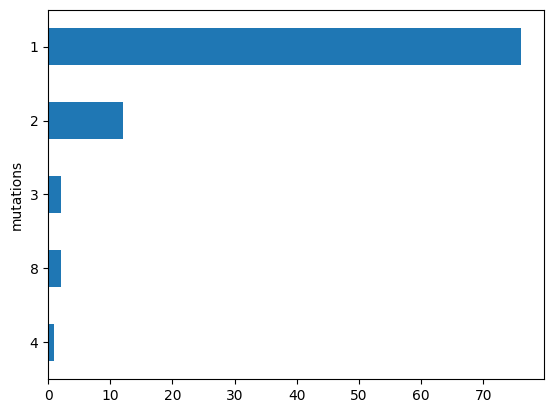

In [ ]:
## plot
_=data.plot.barh(xlabel='mutations',ylabel='reads')

### Read depth per nucleotide mutations

In [ ]:
data=df.dseq.get_counts_per_nt_mutation()
data.head(1)

,reference position,reference,read,depth
0,74846395.0,C,C,NaN


#### Mutation map

In [ ]:
data.dseq.get_map(value='depth',aggfunc='sum')

reference position,74846395.0,74846396.0,74846397.0,74846398.0,74846399.0,74846400.0,74846401.0,74846402.0,74846403.0,74846404.0,74846405.0,74846406.0,74846407.0,74846408.0,74846409.0,74846410.0,74846411.0,74846412.0,74846413.0,74846414.0,74846415.0,74846416.0,74846417.0,74846418.0,74846419.0,74846420.0,74846421.0,74846422.0,74846423.0,74846424.0,74846425.0,74846426.0,74846427.0,74846428.0,74846429.0,74846430.0,74846431.0,74846432.0,74846433.0,74846434.0,74846435.0,74846436.0,74846437.0,74846438.0,74846439.0,74846440.0,74846441.0,74846442.0,74846443.0,74846444.0,74846445.0,74846446.0,74846447.0,74846448.0,74846449.0,74846450.0,74846451.0,74846452.0,74846453.0,74846454.0,74846455.0,74846456.0,74846457.0,74846458.0,74846459.0,74846460.0,74846461.0,74846462.0,74846463.0,74846464.0,74846465.0,74846466.0,74846467.0,74846468.0,74846469.0,74846470.0,74846471.0,74846472.0,74846473.0,74846474.0,74846475.0,74846476.0,74846477.0,74846478.0,74846479.0,74846480.0,74846481.0,74846482.0,74846483.0,74846484.0,74846485.0,74846486.0,74846487.0,74846488.0,74846489.0,74846490.0,74846491.0,74846492.0,74846493.0,74846494.0,74846495.0,74846496.0,74846497.0,74846498.0,74846499.0,74846500.0,74846501.0,74846502.0,74846503.0,74846504.0,74846505.0,74846506.0,74846507.0,74846508.0,74846509.0,74846510.0,74846511.0,74846512.0,74846513.0,74846514.0,74846515.0,74846516.0,74846517.0,74846518.0,74846519.0,74846520.0,74846521.0,74846522.0,74846523.0,74846524.0,74846525.0,74846526.0,74846527.0,74846528.0,74846529.0,74846530.0,74846531.0,74846532.0,74846533.0,74846534.0,74846535.0,74846536.0,74846537.0,74846538.0,74846539.0,74846540.0,74846541.0,74846542.0,74846543.0,74846544.0,74846545.0
reference,C,C,T,A,A,G,C,C,T,T,T,A,C,G,G,T,C,A,C,T,C,A,C,C,A,C,T,C,A,C,T,C,A,C,T,C,A,C,T,C,A,C,C,C,A,G,A,G,C,A,A,C,T,T,C,C,G,G,T,C,C,T,G,C,A,A,A,C,T,C,C,C,T,T,C,A,T,A,G,T,A,A,G,T,G,C,C,C,T,A,T,A,C,A,G,G,T,G,T,A,T,A,A,T,T,A,A,A,A,A,G,A,A,A,A,T,A,T,T,T,T,A,T,A,C,C,A,T,G,G,T,T,T,T,A,C,T,G,T,A,C,C,T,C,C,A,T,G,G,T,T
read,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
C,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,1,0,2,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
G,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,2
T,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Substitution map

In [ ]:
data.dseq.get_submap(value='depth',aggfunc='sum')

reference,A,C,G,T
read,,,,
A,0,2,6,2
C,5,0,0,29
G,19,0,0,25
T,5,2,5,0


### Read depth per codons

In [ ]:
data=df.dseq.get_counts_per_codon_mutation()
data.head(1)

,reference position,codon reference,codon read,depth
0,74846395.0,CCT,CCC,2.0


#### Mutation map

In [ ]:
data.dseq.get_map(value='depth',aggfunc='sum')

#### Substitution map

In [ ]:
data.dseq.get_submap(value='depth',aggfunc='sum')

codon reference,AAA,AAG,ACC,ACT,AGG,AGT,ATA,ATG,ATT,CAA,CAC,CAT,CCA,CCC,CCG,CCT,CGG,CTA,CTC,CTG,CTT,GAG,GCC,GGT,GTA,GTC,GTT,TAC,TAT,TCA,TGT,TTA,TTC,TTT
codon read,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAA,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAC,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAG,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACA,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0
ACC,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ACT,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGA,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGC,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AGG,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Read depth per amino acids

In [ ]:
data=df.dseq.get_counts_per_aa_mutation()
data.head(1)

,reference position,codon reference,codon read,depth,aa reference,aa read
0,74846395.0,CCT,CCC,2.0,P,P


#### Mutation map

In [ ]:
data.dseq.get_map(value='depth',aggfunc='sum')

#### Substitution map

In [ ]:
data.dseq.get_submap(value='depth',aggfunc='sum')

aa reference,A,C,E,F,G,H,I,K,L,M,P,Q,R,S,T,V,Y
aa read,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,6,0
C,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
D,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
E,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
G,0,0,0,0,3,0,0,0,0,0,0,0,3,0,0,3,0
H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
I,0,0,0,0,0,0,0,3,3,6,0,0,0,0,0,9,0
K,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0


## How to

### Normalize read depth of a mutations by the cumulative read depth, to calculate mutation freqency

In [ ]:
data=df.dseq.get_frequencies_per_nt_mutation()
data.head(1)

,reference position,reference,read,depth mutation,depth total,frequency
0,74846395.0,C,C,NaN,377,NaN


#### Mutation map

In [ ]:
data.dseq.get_map(value='frequency',aggfunc='sum',fmt="{:.3f}")

reference position,74846395.0,74846396.0,74846397.0,74846398.0,74846399.0,74846400.0,74846401.0,74846402.0,74846403.0,74846404.0,74846405.0,74846406.0,74846407.0,74846408.0,74846409.0,74846410.0,74846411.0,74846412.0,74846413.0,74846414.0,74846415.0,74846416.0,74846417.0,74846418.0,74846419.0,74846420.0,74846421.0,74846422.0,74846423.0,74846424.0,74846425.0,74846426.0,74846427.0,74846428.0,74846429.0,74846430.0,74846431.0,74846432.0,74846433.0,74846434.0,74846435.0,74846436.0,74846437.0,74846438.0,74846439.0,74846440.0,74846441.0,74846442.0,74846443.0,74846444.0,74846445.0,74846446.0,74846447.0,74846448.0,74846449.0,74846450.0,74846451.0,74846452.0,74846453.0,74846454.0,74846455.0,74846456.0,74846457.0,74846458.0,74846459.0,74846460.0,74846461.0,74846462.0,74846463.0,74846464.0,74846465.0,74846466.0,74846467.0,74846468.0,74846469.0,74846470.0,74846471.0,74846472.0,74846473.0,74846474.0,74846475.0,74846476.0,74846477.0,74846478.0,74846479.0,74846480.0,74846481.0,74846482.0,74846483.0,74846484.0,74846485.0,74846486.0,74846487.0,74846488.0,74846489.0,74846490.0,74846491.0,74846492.0,74846493.0,74846494.0,74846495.0,74846496.0,74846497.0,74846498.0,74846499.0,74846500.0,74846501.0,74846502.0,74846503.0,74846504.0,74846505.0,74846506.0,74846507.0,74846508.0,74846509.0,74846510.0,74846511.0,74846512.0,74846513.0,74846514.0,74846515.0,74846516.0,74846517.0,74846518.0,74846519.0,74846520.0,74846521.0,74846522.0,74846523.0,74846524.0,74846525.0,74846526.0,74846527.0,74846528.0,74846529.0,74846530.0,74846531.0,74846532.0,74846533.0,74846534.0,74846535.0,74846536.0,74846537.0,74846538.0,74846539.0,74846540.0,74846541.0,74846542.0,74846543.0,74846544.0,74846545.0
reference,C,C,T,A,A,G,C,C,T,T,T,A,C,G,G,T,C,A,C,T,C,A,C,C,A,C,T,C,A,C,T,C,A,C,T,C,A,C,T,C,A,C,C,C,A,G,A,G,C,A,A,C,T,T,C,C,G,G,T,C,C,T,G,C,A,A,A,C,T,C,C,C,T,T,C,A,T,A,G,T,A,A,G,T,G,C,C,C,T,A,T,A,C,A,G,G,T,G,T,A,T,A,A,T,T,A,A,A,A,A,G,A,A,A,A,T,A,T,T,T,T,A,T,A,C,C,A,T,G,G,T,T,T,T,A,C,T,G,T,A,C,C,T,C,C,A,T,G,G,T,T
read,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000
C,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.005,0.000,0.003,0.000,0.005,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.003,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000
G,0.000,0.000,0.000,0.000,0.003,0.00

#### Substitution map

In [ ]:
data.dseq.get_submap(value='frequency',aggfunc='sum',fmt="{:.3f}")

reference,A,C,G,T
read,,,,
A,0.000,0.005,0.016,0.005
C,0.013,0.000,0.000,0.077
G,0.051,0.000,0.000,0.069
T,0.013,0.005,0.014,0.000


### Extract indels

In [ ]:
data=(df
    .query("`CIGAR`.str.contains('I') or `CIGAR`.str.contains('D')") ## keep indels
    )
data.head(1)

,query id,CIGAR,read position,reference position,reference,read
37,M04377:211:000000000-D637H:1:1101:10676:7283::...,22M1D129M,36.0,74846395.0,C,C


## How to cite

    @misc{Dandage2023,
      author = {Dandage, Rohan},
      title = {Deep sequencing data analysis in pandas.},
      year = {2023},
      publisher = {GitHub},
      journal = {GitHub repository},
      howpublished = {\url{https://github.com/rraadd88/dseq}},
    }

## Similar Projects
- [`perbase`](https://github.com/sstadick/perbase) Rust
- [`sambamba depth`](https://github.com/biod/sambamba/wiki/%5Bsambamba-depth%5D-documentation) D
- [`samtools depth`](http://www.htslib.org/doc/samtools-depth.html) C
- [`mosdepth`](https://github.com/brentp/mosdepth) Nim
- [`bam-readcount`](https://github.com/genome/bam-readcount) C++